In [1]:
from torchvision.models.detection.backbone_utils import resnet_fpn_backbone
import torch

import sys, os
from models.subpix_rcnn import SubpixRCNN
from utils import move_data_to_device, move_dict_to_cpu, plot_image_boxes, evaluate_predictions
from PsfSimulator import PsfDataset
from scripts.plotting import PlotController
from scripts.evaluating import test_model_fixed_snr, test_model_once_plot, evaluate_recall_per_snr
import numpy as np

In [2]:
seed = None
num_datapoints = 1
num_spots_min = 1
num_spots_max = 1
sigma_mean= 1.0
sigma_std = 0.1
snr_min = 5
snr_max = 5
snr_std = 0.0
base_noise_min = 50
base_noise_max = 6000
use_gauss_noise = False
gauss_noise_std = 0.02
use_perlin_noise = False
perlin_min_max = (0.4, 0.6)
img_w = 64
img_h = 64

dataset = PsfDataset(seed, num_datapoints, num_spots_min, num_spots_max, sigma_mean, sigma_std,
                      snr_min, snr_max, snr_std, base_noise_min, base_noise_max, use_gauss_noise,
                      gauss_noise_std, use_perlin_noise, perlin_min_max, img_w, img_h)



In [2]:
device = 'cuda'
backbone = resnet_fpn_backbone("resnet50", pretrained=True)
kwargs = {"nms_thresh": 0.1, "detections_per_img": None, "score_thresh": 0.5}
model = SubpixRCNN(backbone, num_classes=2, device=device, **kwargs)
model.to(device=device)
path = r"D:\zeiss\Desktop\coding\Hilger\bachelor\subpix_rcnn_models\2025-05-24_13-46-15\second_long_run.pth"
model.load_state_dict(torch.load(path, map_location=device))
model.eval()

c:\Users\zeiss\anaconda3\envs\hilger312\Lib\site-packages\torchvision\models\_utils.py:135: UserWarning: Using 'backbone_name' as positional parameter(s) is deprecated since 0.13 and may be removed in the future. Please use keyword parameter(s) instead.
  warnings.warn(
c:\Users\zeiss\anaconda3\envs\hilger312\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\zeiss\anaconda3\envs\hilger312\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Custom SubpixRoIHeads successfully initialized!


SubpixRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=1e-05)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=1e-05)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=1e-05)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=1e-05)
          (relu

In [ ]:
result = evaluate_recall_per_snr(model, 20000, device, 0.5, **params)
params = {'snr_min': 1, 'snr_max': 10}


Processing image 1/20000
Processing image 101/20000
Processing image 201/20000
Processing image 301/20000
Processing image 401/20000
Processing image 501/20000
Processing image 601/20000
Processing image 701/20000
Processing image 801/20000
Processing image 901/20000
Processing image 1001/20000
Processing image 1101/20000
Processing image 1201/20000
Processing image 1301/20000
Processing image 1401/20000
Processing image 1501/20000
Processing image 1601/20000
Processing image 1701/20000
Processing image 1801/20000
Processing image 1901/20000
Processing image 2001/20000
Processing image 2101/20000
Processing image 2201/20000
Processing image 2301/20000
Processing image 2401/20000
Processing image 2501/20000
Processing image 2601/20000
Processing image 2701/20000
Processing image 2801/20000
Processing image 2901/20000
Processing image 3001/20000
Processing image 3101/20000
Processing image 3201/20000
Processing image 3301/20000
Processing image 3401/20000
Processing image 3501/20000
Proc

In [15]:
import numpy as np
import matplotlib.pyplot as plt

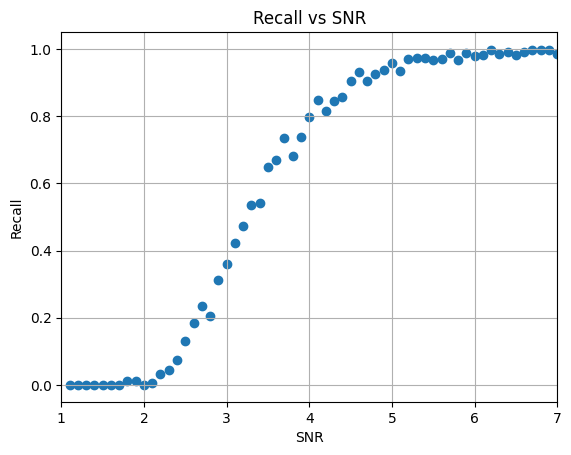

In [16]:
snrs = np.array(list(result.keys()))
recalls = np.array([result[snr]['TP'] / (result[snr]['TP'] + result[snr]['FN']) for snr in snrs])
plt.scatter(snrs, recalls)
plt.xlabel('SNR')
plt.ylabel('Recall')
plt.title('Recall vs SNR')
plt.xlim(1,7)
plt.grid()
plt.show()

# Maybe interesting to show for different background noise levels? Different score_thresh?

In [18]:
print(type(result))

<class 'collections.defaultdict'>


In [20]:
import pickle
result_dict = dict(result)
save_path = r'd:\zeiss\Desktop\coding\Hilger\bachelor\recall_vs_snr_widerangeofbg.pkl'

with open(save_path, 'wb') as f:
    pickle.dump(result_dict, f)

In [3]:
denseresults3snr = test_model_fixed_snr(model, snr=3, num_images=300, device=device)

Testing density: 0.04
Density: 0.04, Metrics: {'precision': 0.5133333333333333, 'recall': 0.5866666666666667, 'avg f1': 0.5366666666666666, 'avg ji': 0.5133333333333333, 'avg loc error': 0.17250520040591558}
Testing density: 0.05
Density: 0.05, Metrics: {'precision': 0.6925555555555555, 'recall': 0.6116666666666667, 'avg f1': 0.624968253968254, 'avg ji': 0.537111111111111, 'avg loc error': 0.25353794762864706}
Testing density: 0.060000000000000005
Density: 0.060000000000000005, Metrics: {'precision': 0.6679523809523811, 'recall': 0.58, 'avg f1': 0.595878306878307, 'avg ji': 0.502674603174603, 'avg loc error': 0.24586419966071843}
Testing density: 0.07
Density: 0.07, Metrics: {'precision': 0.639111111111111, 'recall': 0.5816666666666667, 'avg f1': 0.5864603174603176, 'avg ji': 0.5002222222222221, 'avg loc error': 0.23859705741206805}
Testing density: 0.08000000000000002
Density: 0.08000000000000002, Metrics: {'precision': 0.7501111111111111, 'recall': 0.5966666666666667, 'avg f1': 0.636

d:\zeiss\Desktop\coding\Hilger\bachelor\PsfSimulator.py:114: RuntimeWarning: All-NaN slice encountered
  signal = np.nanmax(array[y1:y2, x1:x2])


Density: 0.5, Metrics: {'precision': 0.7590206564858936, 'recall': 0.5441666666666661, 'avg f1': 0.6193271490354018, 'avg ji': 0.4648761656273651, 'avg loc error': 0.3090736531217893}
Testing density: 0.6
Density: 0.6, Metrics: {'precision': 0.759394954659589, 'recall': 0.5543055555555554, 'avg f1': 0.6281412460519905, 'avg ji': 0.4706410472495892, 'avg loc error': 0.31065018023053803}
Testing density: 0.7000000000000001
Density: 0.7000000000000001, Metrics: {'precision': 0.7579247892216044, 'recall': 0.5335714285714287, 'avg f1': 0.6112988311615741, 'avg ji': 0.45392736344011825, 'avg loc error': 0.30887192909916245}
Testing density: 0.8
Density: 0.8, Metrics: {'precision': 0.7519737518673818, 'recall': 0.5322916666666667, 'avg f1': 0.6126800598584635, 'avg ji': 0.45396577902285307, 'avg loc error': 0.3143928514420986}
Testing density: 0.9
Density: 0.9, Metrics: {'precision': 0.7504823722272165, 'recall': 0.5109259259259259, 'avg f1': 0.5930608422008615, 'avg ji': 0.4351235204102268, 

d:\zeiss\Desktop\coding\Hilger\bachelor\PsfSimulator.py:124: RuntimeWarning: divide by zero encountered in scalar divide
  snr = (signals[i]-mean) / std
d:\zeiss\Desktop\coding\Hilger\bachelor\PsfSimulator.py:121: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(array[y1:y2, x1:x2])
c:\Users\zeiss\anaconda3\envs\hilger312\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:2019: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


Density: 4.0, Metrics: {'precision': 0.6472566697709723, 'recall': 0.28920245398773015, 'avg f1': 0.39484035168017, 'avg ji': 0.24965763316520348, 'avg loc error': 0.328577098151048}


C:\Users\zeiss\AppData\Local\Temp\ipykernel_23248\265205568.py:12: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0, 5)


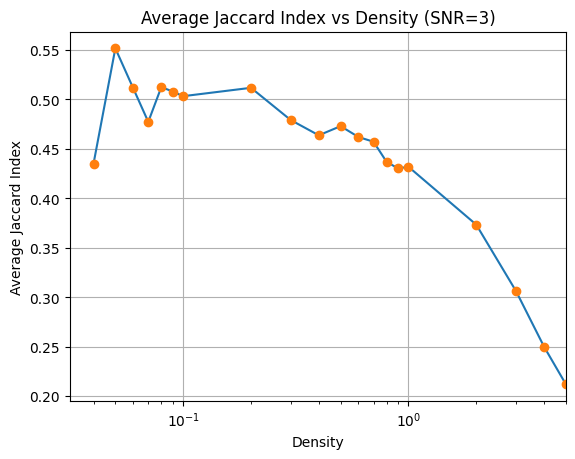

In [13]:
# Plot the dict with densities (keys) on the x-axis and the average ji on on the y-axis
import matplotlib.pyplot as plt
densities = np.array(list(denseresults3snr.keys()))
average_jis = np.array([denseresults3snr[density]['avg ji'] for density in densities])

plt.plot(densities, average_jis)
plt.semilogx(densities, average_jis, marker='o', linestyle='None')  # log x-axis, scatter style

plt.xlabel('Density')
plt.ylabel('Average Jaccard Index')
plt.title('Average Jaccard Index vs Density (SNR=3)')
plt.xlim(0, 5)
plt.grid()
plt.show()

In [4]:
denseresults8snr = test_model_fixed_snr(model, snr=8, num_images=300, device=device)

Testing density: 0.04
Density: 0.04, Metrics: {'precision': 0.9352777777777779, 'recall': 1.0, 'avg f1': 0.9557777777777775, 'avg ji': 0.9352777777777779, 'avg loc error': 0.16641526303486898}
Testing density: 0.05
Density: 0.05, Metrics: {'precision': 0.9599999999999999, 'recall': 1.0, 'avg f1': 0.9755555555555562, 'avg ji': 0.9599999999999999, 'avg loc error': 0.1590662998209397}
Testing density: 0.060000000000000005
Density: 0.060000000000000005, Metrics: {'precision': 0.9546666666666666, 'recall': 0.9966666666666667, 'avg f1': 0.9707936507936513, 'avg ji': 0.9535555555555555, 'avg loc error': 0.1652838795694212}
Testing density: 0.07
Density: 0.07, Metrics: {'precision': 0.9616666666666663, 'recall': 0.9966666666666667, 'avg f1': 0.9751111111111116, 'avg ji': 0.9616666666666663, 'avg loc error': 0.1619647849847873}
Testing density: 0.08000000000000002
Density: 0.08000000000000002, Metrics: {'precision': 0.9783888888888889, 'recall': 0.9966666666666667, 'avg f1': 0.985769841269841, 

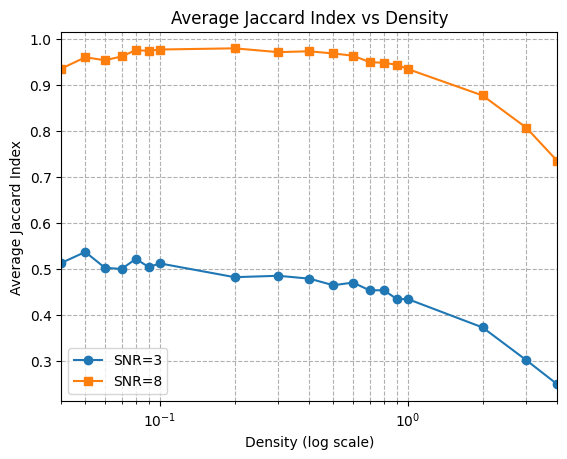

In [ ]:
densities3 = np.array(list(denseresults3snr.keys()))
average_jis3 = np.array([denseresults3snr[density]['avg ji'] for density in densities3])
densities5 = np.array(list(denseresults5snr.keys()))
average_jis5 = np.array([denseresults3snr[density]['avg ji'] for density in densities5])
densities8 = np.array(list(denseresults8snr.keys()))
average_jis8 = np.array([denseresults8snr[density]['avg ji'] for density in densities8])

plt.semilogx(densities3, average_jis3, marker='o', linestyle='-', label='SNR=3')
plt.semilogx(densities8, average_jis8, marker='s', linestyle='-', label='SNR=8')

plt.xlabel('Density (log scale)')
plt.ylabel('Average Jaccard Index')
plt.title('Average Jaccard Index vs Density')
plt.xlim(min(densities3.min(), densities8.min()), max(densities3.max(), densities8.max()))
plt.grid(True, which="both", ls="--")
plt.legend()
plt.show()

In [7]:
import matplotlib.pyplot as plt

In [9]:
denseresults5snr = test_model_fixed_snr(model, snr=5, num_images=300, device=device)

Testing density: 0.04
Density: 0.04, Metrics: {'precision': 0.8836111111111112, 'recall': 0.96, 'avg f1': 0.9074444444444443, 'avg ji': 0.8836111111111112, 'avg loc error': 0.23372105622664094}
Testing density: 0.05
Density: 0.05, Metrics: {'precision': 0.9188888888888888, 'recall': 0.9766666666666667, 'avg f1': 0.9393333333333338, 'avg ji': 0.9074999999999999, 'avg loc error': 0.23117340847228965}
Testing density: 0.060000000000000005
Density: 0.060000000000000005, Metrics: {'precision': 0.9038888888888884, 'recall': 0.9583333333333334, 'avg f1': 0.9231111111111117, 'avg ji': 0.8877777777777776, 'avg loc error': 0.23428346150865156}
Testing density: 0.07
Density: 0.07, Metrics: {'precision': 0.9066111111111109, 'recall': 0.9583333333333334, 'avg f1': 0.9240158730158735, 'avg ji': 0.888111111111111, 'avg loc error': 0.23215000859151283}
Testing density: 0.08000000000000002
Density: 0.08000000000000002, Metrics: {'precision': 0.9311666666666667, 'recall': 0.9577777777777777, 'avg f1': 0

d:\zeiss\Desktop\coding\Hilger\bachelor\PsfSimulator.py:114: RuntimeWarning: All-NaN slice encountered
  signal = np.nanmax(array[y1:y2, x1:x2])


Density: 0.7000000000000001, Metrics: {'precision': 0.936603549747677, 'recall': 0.8922619047619045, 'avg f1': 0.9131582820122323, 'avg ji': 0.8463860731433748, 'avg loc error': 0.24552082881331444}
Testing density: 0.8
Density: 0.8, Metrics: {'precision': 0.936314851594835, 'recall': 0.8853125, 'avg f1': 0.9093684678126304, 'avg ji': 0.8395320680202635, 'avg loc error': 0.24861038466294608}
Testing density: 0.9
Density: 0.9, Metrics: {'precision': 0.9342306864473564, 'recall': 0.8798148148148153, 'avg f1': 0.9055681846863732, 'avg ji': 0.8329170528169323, 'avg loc error': 0.24525803923606873}
Testing density: 1.0
Density: 1.0, Metrics: {'precision': 0.9332741967459325, 'recall': 0.8725833333333335, 'avg f1': 0.9013433718671103, 'avg ji': 0.8250421219713447, 'avg loc error': 0.2482178431749344}
Testing density: 2.0
Density: 2.0, Metrics: {'precision': 0.9009369515875096, 'recall': 0.7858024691358025, 'avg f1': 0.8385138805860017, 'avg ji': 0.7264653045315489, 'avg loc error': 0.2584277

d:\zeiss\Desktop\coding\Hilger\bachelor\PsfSimulator.py:124: RuntimeWarning: divide by zero encountered in scalar divide
  snr = (signals[i]-mean) / std


Density: 4.0, Metrics: {'precision': 0.8219232131558203, 'recall': 0.5750511247443757, 'avg f1': 0.6743630035641095, 'avg ji': 0.5149851955694873, 'avg loc error': 0.2759063425660133}


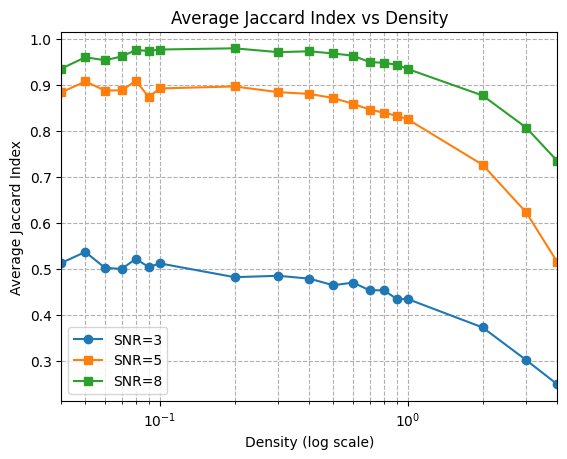

In [11]:
densities3 = np.array(list(denseresults3snr.keys()))
average_jis3 = np.array([denseresults3snr[density]['avg ji'] for density in densities3])
densities5 = np.array(list(denseresults5snr.keys()))
average_jis5 = np.array([denseresults5snr[density]['avg ji'] for density in densities5])
densities8 = np.array(list(denseresults8snr.keys()))
average_jis8 = np.array([denseresults8snr[density]['avg ji'] for density in densities8])

plt.semilogx(densities3, average_jis3, marker='o', linestyle='-', label='SNR=3')
plt.semilogx(densities5, average_jis5, marker='s', linestyle='-', label='SNR=5')
plt.semilogx(densities8, average_jis8, marker='s', linestyle='-', label='SNR=8')

plt.xlabel('Density (log scale)')
plt.ylabel('Average Jaccard Index')
plt.title('Average Jaccard Index vs Density')
plt.xlim(min(densities3.min(), densities8.min()), max(densities3.max(), densities8.max()))
plt.grid(True, which="both", ls="--")
plt.legend()
plt.show()

In [ ]:
save_path = r'd:\zeiss\Desktop\coding\Hilger\bachelor\densities_10smr.pkl'
with open(save_path, 'wb') as f:
    pickle.dump(denseresults10snr, f)

In [17]:
denseresults10snr = test_model_fixed_snr(model, snr=10, num_images=300, device=device)

Testing density: 0.04
Density: 0.04, Metrics: {'precision': 0.9308333333333333, 'recall': 1.0, 'avg f1': 0.9530000000000001, 'avg ji': 0.9308333333333333, 'avg loc error': 0.13500615103791158}
Testing density: 0.05
Density: 0.05, Metrics: {'precision': 0.9618888888888887, 'recall': 1.0, 'avg f1': 0.9765714285714292, 'avg ji': 0.9618888888888887, 'avg loc error': 0.13546090201164285}
Testing density: 0.060000000000000005
Density: 0.060000000000000005, Metrics: {'precision': 0.965, 'recall': 0.9966666666666667, 'avg f1': 0.9770000000000004, 'avg ji': 0.962777777777778, 'avg loc error': 0.13406612320803105}
Testing density: 0.07
Density: 0.07, Metrics: {'precision': 0.9627777777777775, 'recall': 1.0, 'avg f1': 0.9773333333333338, 'avg ji': 0.9627777777777775, 'avg loc error': 0.13415320641050735}
Testing density: 0.08000000000000002
Density: 0.08000000000000002, Metrics: {'precision': 0.9822222222222223, 'recall': 0.9988888888888889, 'avg f1': 0.9893650793650796, 'avg ji': 0.9816666666666

d:\zeiss\Desktop\coding\Hilger\bachelor\PsfSimulator.py:114: RuntimeWarning: All-NaN slice encountered
  signal = np.nanmax(array[y1:y2, x1:x2])


Density: 0.7000000000000001, Metrics: {'precision': 0.9949668035030103, 'recall': 0.9688095238095247, 'avg f1': 0.9814507742003601, 'avg ji': 0.9646631089217306, 'avg loc error': 0.1434863549719254}
Testing density: 0.8
Density: 0.8, Metrics: {'precision': 0.9957006903425607, 'recall': 0.9685416666666666, 'avg f1': 0.9816682778600676, 'avg ji': 0.9649565508021387, 'avg loc error': 0.14517702706158161}
Testing density: 0.9
Density: 0.9, Metrics: {'precision': 0.9943813080188791, 'recall': 0.9606481481481508, 'avg f1': 0.9770004219540573, 'avg ji': 0.956043411832888, 'avg loc error': 0.14802679320176443}
Testing density: 1.0
Density: 1.0, Metrics: {'precision': 0.994816882506228, 'recall': 0.9583333333333315, 'avg f1': 0.9760260742947908, 'avg ji': 0.9539283283364387, 'avg loc error': 0.14785242778559526}
Testing density: 2.0
Density: 2.0, Metrics: {'precision': 0.9877901269926878, 'recall': 0.9107407407407389, 'avg f1': 0.9474365747902596, 'avg ji': 0.9012635351426841, 'avg loc error': 

d:\zeiss\Desktop\coding\Hilger\bachelor\PsfSimulator.py:124: RuntimeWarning: divide by zero encountered in scalar divide
  snr = (signals[i]-mean) / std


Density: 4.0, Metrics: {'precision': 0.9636277600647037, 'recall': 0.8020449897750521, 'avg f1': 0.8751586734437035, 'avg ji': 0.7795791970067617, 'avg loc error': 0.18981868276993433}


In [18]:
save_path = r'd:\zeiss\Desktop\coding\Hilger\bachelor\densities_10smr.pkl'
with open(save_path, 'wb') as f:
    pickle.dump(denseresults10snr, f)

In [ ]:
densities3 = np.array(list(denseresults3snr.keys()))
average_jis3 = np.array([denseresults3snr[density]['avg ji'] for density in densities3])
densities5 = np.array(list(denseresults5snr.keys()))
average_jis5 = np.array([denseresults5snr[density]['avg ji'] for density in densities5])
densities8 = np.array(list(denseresults8snr.keys()))
average_jis8 = np.array([denseresults8snr[density]['avg ji'] for density in densities8])
densities10 = np.array(list(denseresults10snr.keys()))
average_jis10 = np.array([denseresults10snr[density]['avg ji'] for density in densities10])

plt.semilogx(densities3, average_jis3, marker='o', linestyle='-', label='SNR=3')
plt.semilogx(densities5, average_jis5, marker='s', linestyle='-', label='SNR=5')
plt.semilogx(densities8, average_jis8, marker='s', linestyle='-', label='SNR=8')

plt.xlabel('Density (log scale)')
plt.ylabel('Average Jaccard Index')
plt.title('Average Jaccard Index vs Density')
plt.xlim(min(densities3.min(), densities8.min()), max(densities3.max(), densities8.max()))
plt.grid(True, which="both", ls="--")
plt.legend()
plt.show()